<div style="text-align:center"> <h1> Youtube trending videos analysis </h1> </div>

As we all know that Youtube is one of the most popular video platform, let's dive deeper
into the trending videos of India and analyze insights, what made them so popular?

<div style="text-align:center">
    <img src="https://c.tenor.com/HMVeLU_a7CkAAAAd/its-all-over-the-internet-its-everywhere.gif" width =200/>
    </div>
    <div style="text-align:center">
       <small><a href=https://tenor.com/view/its-all-over-the-internet-its-everywhere-trending-trend-michael-campion-gif-15124833>© tenor</a></small>
    </div>
    <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_videos = pd.read_csv('./DATA/archive/INvideos.csv')

In [3]:
df_category = pd.read_json('./DATA/archive/IN_category_id.json')

In [4]:
df_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [5]:
df_category.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [6]:
df_videos.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [7]:
df_videos["description"].head()

0    Presenting Sharry Mann latest Punjabi Song  Cu...
1    पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...
2    Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3    This video showcases the difference between pe...
4    why Samantha became EMOTIONAL @ Samantha naga ...
Name: description, dtype: object

In [8]:
df_videos["description"].isnull().sum()

561

In [9]:
df_videos["description"].count()

36791

Description column has 561 null values and our dataset has total 36791 records, 
so we can either drop the records with the null values, or we can simply replace null
with the empty string. 

            I'll replace nulls with empty string

In [10]:
df_videos["description"] =  df_videos["description"].fillna('')

In [11]:
df_videos.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


Compared to the total views 2.5 % of people liked the videos, only 0.25 % of users have
commented on videos


In [12]:
# function to check if title has atleast on capitalized word
def contains_cap_word(title):
    for word in title.split():
        if word.isupper():
            return True
    return False

In [13]:
contains_cap_word("i am all small")

False

In [14]:
contains_cap_word("i have CAPS")

True

In [15]:
df_videos["title_has_cap"] = df_videos["title"].apply(contains_cap_word)

In [16]:
df_videos["title_has_cap"].value_counts()
# 37352

False    22474
True     14878
Name: title_has_cap, dtype: int64

Text(0.5, 0, 'Title with atlest one capital word')

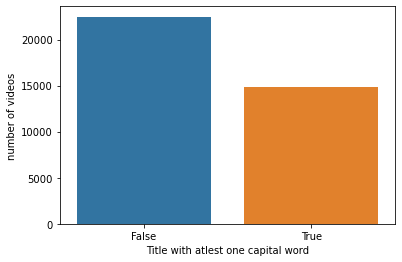

In [17]:
sns.countplot(data=df_videos,x="title_has_cap")
plt.ylabel('number of videos')
plt.xlabel('Title with atlest one capital word')

1. Majority of trending videos does not contain the Capital words
2. only 39.83 videos have the capital word in their video.

        Capital words may help in getting the attention of user, but as we can observe
        it is not that much important factor for video to get into trending one.

In [18]:
df_videos['title_length'] = df_videos["title"].apply(lambda x : len(x))

In [19]:
df_videos['title_length'].head()

0    81
1    58
2    58
3    30
4    88
Name: title_length, dtype: int64

Text(0.5, 0, 'Title length')

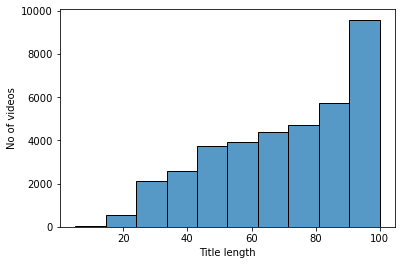

In [20]:
sns.histplot(df_videos["title_length"],bins=10)
plt.ylabel("No of videos")
plt.xlabel("Title length")

As we can observe, lot's of viral videos has the title length more than 70 characters.
let's plot the relation with scatter plot for better visualization 

<AxesSubplot:xlabel='title_length', ylabel='likes'>

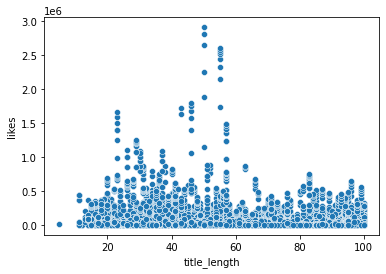

In [21]:
sns.scatterplot(data=df_videos, x="title_length",y="likes")

<AxesSubplot:xlabel='title_length', ylabel='views'>

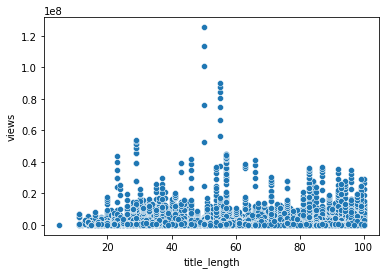

In [22]:
sns.scatterplot(data=df_videos, x="title_length",y="views")

Although, there lot's of trending videos which has long title length but from the scatter plot, we can observe that number of likes and views are independent of title length. 

<AxesSubplot:xlabel='likes', ylabel='views'>

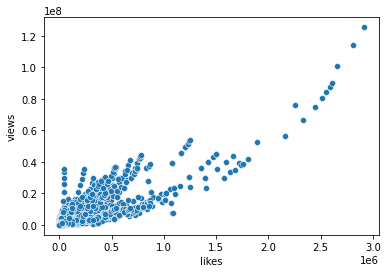

In [23]:
sns.scatterplot(data=df_videos, x="likes",y="views")

<AxesSubplot:xlabel='likes', ylabel='comment_count'>

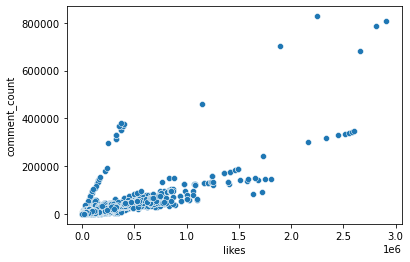

In [24]:
sns.scatterplot(data=df_videos, x="likes",y="comment_count")

<AxesSubplot:xlabel='views', ylabel='comment_count'>

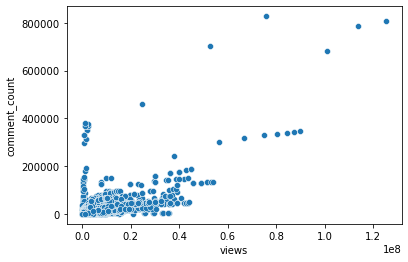

In [25]:
sns.scatterplot(data=df_videos, x="views",y="comment_count")

We can imply that Views, likes and comments are strongly correlated to each other,
which also makes sense intuitively more views means more user have seen the videos and
they may like or add a comment on it.

Let's try to find out the most common words in the viral videos, for that we will
use the word cloud, higher the frequency of word in dataset's title, bigger the font size

In [26]:
title_words = list(df_videos["title"].apply(lambda x : x.split()))

In [27]:
title_words[3]

['Eruma', 'Saani', '|', 'Tamil', 'vs', 'English']

In [28]:
title_words = pd.Series(title_words)

In [29]:
title_words =  title_words[title_words.str.len() > 3]

In [30]:
title_words = [x for y in title_words for x in y]

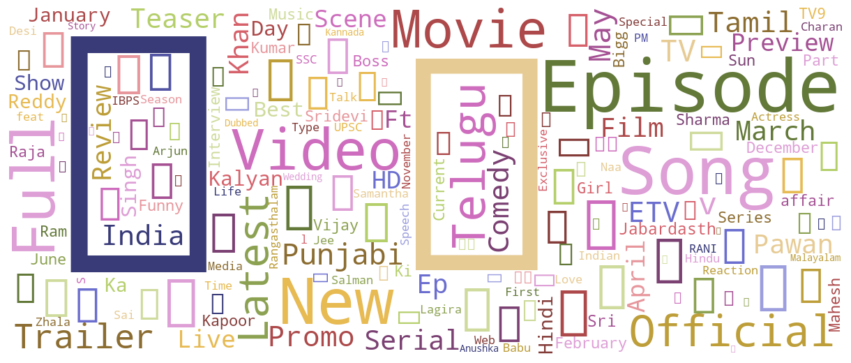

In [32]:
import wordcloud
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")


In [40]:
# the unsupported words w
wc.words_
# hindi words can't be displayed by wordcloud, We have to figure out work around

dict_keys(['क', 'र', 'Episode', 'த', 'க', 'Song', 'स', 'New', 'म', 'న', 'ర', 'न', 'ल', 'Full', 'य', 'Video', 'द', 'త', 'క', 'त', 'Movie', 'ల', 'స', 'ட', 'ग', 'ய', 'ப', 'ക', 'ह', 'ர', 'வ', 'ട', 'ప', 'ம', 'Telugu', 'ச', 'ब', 'ന', 'ज', 'డ', 'Official', 'व', 'చ', 'प', 'Latest', 'ல', 'ట', 'వ', 'Trailer', 'ன', 'ద', 'మ', 'v', 'യ', 'ത', 'च', 'May', 'TV', 'പ', 'య', 'श', 'भ', 'Punjabi', 'Tamil', 'വ', 'గ', 'Promo', 'Comedy', 'ETV', 'India', 'ट', 'ച', 'ண', 'March', 'Khan', 'Teaser', 'ല', 'Serial', 'Ep', 'Pawan', 'ड', 'Review', 'Film', 'Preview', 'April', 'Ft', 'Live', 'Scene', 'HD', 'ற', 'Kalyan', 'Day', 'ख', 'ര', 'ದ', 'Singh', 'മ', 'Best', 'ந', 'कर', 'റ', 'జ', 'Show', 'January', 'Ka', 'Hindi', 'फ', 'Reddy', 'Jabardasth', 'Sri', 'கள', 'February', 'Sharma', 'Ki', 'पर', 'ರ', 'శ', 'December', 'Boss', 'Sun', 'TV9', 'Vijay', 'Kapoor', 'Interview', 'Series', 'ತ', 'ள', 'Sridevi', 'സ', 'ష', 'Part', 'affair', 'Raja', 'బ', 'Bigg', 'June', 'ನ', 'Mahesh', 'ಗ', 'Girl', 'Funny', 'Ram', 'ಕ', 'Kumar', 'Music', 'C

In [41]:
# we'll extract the keys, and convert then into series so that later on we can filter
# unsupported hindi words

title_words = pd.Series(wc.words_.keys())

In [42]:
title_words

0            क
1            र
2      Episode
3            த
4            க
        ...   
195    Wedding
196      Story
197     Dubbed
198    Kannada
199    Anushka
Length: 200, dtype: object

In [43]:
title_words = title_words[title_words.str.len() > 3]

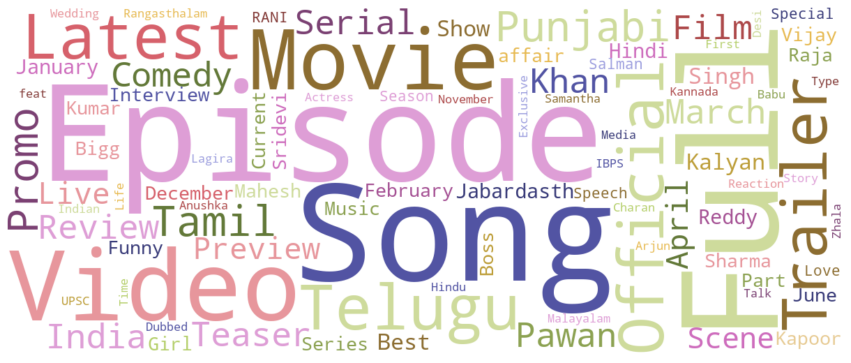

In [44]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")


In [ ]:
# Thank you!